# Problem 1

## Part 1a

Given $f(x,y) = \cos(x)\cos(y/10) \, x\in [-\pi/2,\pi/2] \, y\in [-10\pi/2,10\pi/2] $, the gradient and Hessian are given by:

$$
\nabla f(x,y) = \left( \begin{array}{} \sin(x)\cos(y/10) \\ \frac{1}{10}\cos(x)\sin(y/10) \end{array}\right)
$$

$$
H(x,y) = 
\left( \begin{array}{}  \cos(x)\cos(y/10) & -\frac{1}{10}\sin(x)\sin(y/10) \\ -\frac{1}{10}\sin(x)\sin(y/10) & \frac{1}{100}\cos(x)\cos(y/10)  \end{array} \right)
$$

The stationary points are: 

1. $(0,0)$: minimum , $H(0,0) = \left(1, 0; 0, 100 \right)$ 
2. $(\pi/2, 10\pi/2)$: saddle point , $H(\pi/2, 10\pi/2) = \left( 0, -1/10; -1/10, 0\right) $
3. $(-\pi/2, 10\pi/2)$: saddle point , $H(-\pi/2, 10\pi/2) = \left( 0, 1/10; 1/10, 0 \right) $
4. $(\pi/2, -10\pi/2)$: saddle point , $H(\pi/2, -10\pi/2) = \left( 0, 1/10; 1/10, 0 \right) $
5. $(-\pi/2, -10\pi/2)$: saddle point , $H(-\pi/2, -10\pi/2) = \left( 0, -1/10; -1/10, 0 \right) $

## Part 1b

The Hessian is clearly symmetric. It is positive definite where the first two pivots are greater than zero, i.e. where

$$ \cos(x)\cos(y/10) > 0 $$
$$ 1 - \tan^2(x)\tan^2(y/10) > 0 $$

which is true in the sub domain bounded by the lines: $ 10x-5\pi < y $; $ -10x+5\pi >y $; $  10x + 5\pi >y $; and $ -10x -5\pi < y $

## Part 1c

Steepest descent direction:

$$ p_k = -g(x_k,y_k) = \left( \begin{array}{} \sin(x)\cos(y/10) \\ \frac{1}{10}\cos(x)\sin(y/10) \end{array}\right)$$

Newton search direction: 

$$
\begin{aligned} 
p_k &= - H_k^{-1}g_k \\
&= -\frac{100}{\cos^2(x)\cos^2(y/10) - \sin^2(x)\sin^2(y/10)}
\left( \begin{array}{} \frac{1}{100}\cos(x)\cos(y/10) & 
\frac{1}{10}\sin(x)\sin(y/10) \\ 
\frac{1}{10}\sin(x)\sin(y/10) &
\cos(x)\cos(y/10)
\end{array}
\right)
\left( \begin{array}{} \sin(x)\cos(y/10) \\ 
\frac{1}{10}\cos(x)\sin(y/10) \end{array}\right)
&= -\frac{100}{\cos^2(x)\cos^2(y/10) - \sin^2(x)\sin^2(y/10)}
\left( \begin{array}{}
      \frac{1}{100} \cos(x)\sin(x)\cos^2(y/10) +
      \frac{1}{100} \cos(x)\sin(x)\sin^2(y/10) \\
      \frac{1}{10} \sin^2(x)\cos(y/10)\sin(y/10) +
      \frac{1}{10} \cos^2(x)\cos(y/10)\sin(y/10)
      \end{array}
\right) \\
&= -\frac{1}{\cos^2(x)\cos^2(y/10) - \sin^2(x)\sin^2(y/10)}
\left( \begin{array}{}
      \cos(x)\sin(x) \\
      10\cos(y/10)\sin(y/10)
      \end{array}
\right) 
\end{aligned}
$$


## Part 1d

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def funk(x):
    ff = np.cos(x[0])*np.cos(x[1]/10.)
    return ff

def steepDir(x):
    p = - np.array( (np.sin(x[0])*np.cos(x[1]/10.) , 0.1 * np.cos(x[0])*np.sin(x[1]/10.)))
    return p

def newtonDir(x):
    den = pow(np.cos(x[0]),2)*pow(np.cos(x[1]/10.),2) - pow(np.sin(x[0]),2)*pow(np.sin(x[1]/10.),2)
    #g = np.array( (np.cos(x[0])*np.sin(x[0]) , 10*np.cos(x[1]/10.)*np.sin(x[1]/10.)) )
    g = np.array( ( (1./100.) * (np.cos(x[0])*np.sin(x[0])*pow(np.cos(1./10.),2)\
                               + np.cos(x[0])*np.sin(x[0])*pow(np.sin(1./10.),2)),
                     (1./10.) * (np.cos(x[1]/10.)*np.sin(x[1]/10.)*pow(np.cos(x[1]/10.),2)\
                               + np.cos(x[1]/10.)*np.sin(x[1]/10.)*pow(np.sin(x[1]/10.),2)) ))
    p = -(100. / den) * g
    return p

def exactLineSearch(x,p):
    def h(alpha,x,p):
        ff = -steepDir(x+alpha*p)
        return np.dot(ff,p)
    
    alpha = newton(h,x0=1,args=(x,p))
    return alpha

def runOptim(x0,methodStr,lsopt):
    x = x0
    err = []
    err.append(np.linalg.norm(x))
    TOL = 10**-16
    itermax = 4000
    niter = 0
    if methodStr == 'newton':
        if lsopt == 'with': 
            while err[-1] > TOL and niter<itermax:
                niter += 1
                p = newtonDir(x)
                alpha = exactLineSearch(x,p)
                x = x + alpha*p
                err.append(np.linalg.norm(x))
        else:
            while err[-1] > TOL and niter<itermax:
                niter += 1
                p = newtonDir(x)
                x = x + p
                err.append(np.linalg.norm(x))
    else: 
        if lsopt == 'with':
            while err[-1] > TOL and niter<itermax:
                niter += 1
                p = steepDir(x)
                alpha = exactLineSearch(x,p)
                x = x + alpha*p
                err.append(np.linalg.norm(x))
        else:
            while err[-1] > TOL and niter<itermax:
                niter += 1
                p = steepDir(x)
                x = x + p
                err.append(np.linalg.norm(x))
    
    if(niter>= 4000):
        print("Solution did not converge")
        
    return (err,niter,x)

## Part 1e

Here I chose three initial guesses: 

$$
\begin{aligned}
&x_0^1 : (4\pi/10, 2\pi) \text{ - outside positive definite region} \\
&x_0^2 : (1.75\pi/10, 2\pi) \text{ - inside positive definite region, outside radius of convergence } \\
&x_0^3 : (\pi/10, 2\pi) \text{ - inside positive definite region and radius of convergence}
\end{aligned}
$$

The number of iterations for each method is:

$x_0^1$:

Newton without LS: does not converge

Newton with LS: does not converge

Steepest descent without LS: 3853

Steepest descent with LS: 28

$x_0^1$:

Newton without LS: does not converge

Newton with LS: 3

Steepest descent without LS: 28

Steepest descent with LS: 110

$x_0^3$:

Newton without LS: 5

Newton with LS: 4

Steepest descent without LS: 3853

Steepest descent with LS: 382

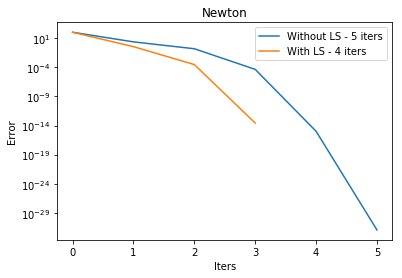

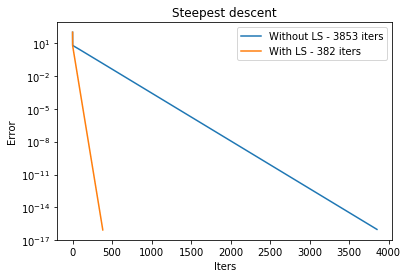

In [67]:
# --- Run without line search
x0 = np.array( (np.pi/10,2*np.pi) )
(enwo,niter_nwo,x) = runOptim(x0,'newton','without')
(eswo,niter_swo,x) = runOptim(x0,'steepest','without')
(enw,niter_nw,x) = runOptim(x0,'newton','with')
(esw,niter_sw,x) = runOptim(x0,'steepest','with')

plt.figure()
plt.semilogy(np.arange(niter_nwo+1),enwo,np.arange(niter_nw+1),enw)
plt.xlabel('Iters')
plt.ylabel('Error')
plt.title('Newton')
plt.legend(('Without LS - %d iters' % niter_nwo,'With LS - %d iters' % niter_nw))
plt.show()

plt.figure()
plt.semilogy(np.arange(niter_swo+1),eswo,np.arange(niter_sw+1),esw)
plt.xlabel('Iters')
plt.ylabel('Error')
plt.legend(('Without LS - %d iters' % niter_swo,'With LS - %d iters' % niter_sw))
plt.title('Steepest descent')
plt.show()


## Part 1f

Steepest descent always converges linearly as we would expect. Newton's method appears to converge quadratically. 

# Problem 2

## Part 2a

Suppose $x^*$ minimizes $f_1$ and $g_1$ is its gradient (similar for $f_2, g_2$). Then,

$$ g_1(x^*) = 0$$
$$ g_2(x^*) = \beta g_2(x^*) = 0$$ 

And since $\beta>0$, the Hessian is positive definite at $x^*$ and so $x^*$ minimizes $f_2$ as well. 

No we cannot construct a first guess for steepest descent. If we consider that our function is quadratic near the minimum and resembles:

$$
f(x) = \frac{1}{2}x^T H x - x^T b
$$

then minimizing $f(x+\alpha p)$ gives: 

$$
\alpha = -\frac{p^Tg}{p^T H p}
$$ 

which for steepest descent becomes: 

$$
\alpha_{initial} = \frac{g^Tg}{g^T H g}
$$

Now if we consider $f_2 = \beta f_1$ then $\alpha_{f_2} = \frac{1}{\beta} \alpha_{f_1}$. This is not desirable because $\alpha$ should be the same (as it is for Newton) since scaling the function does not change how far to move in the search direction. 

Also this assumes that we have computed the Hessian, where if we've done this then we might as well use Newton's method. 

## Part 2b

Since the matrix $B$ is nonsingular, it is invertible, thus the Newton's step is the same as the original problem. If the original Newton's step is given by:

$$
p_k = -H_k^{-1}g_k
$$

Then for the modified problem: 

$$ 
H_{k,2} = \nabla g_{k,2} = \nabla B g_k = B \nabla g_k = H_k
$$

So then the step is

$$
\begin{aligned}
p_{k,2} &= - H^{-1}_{k,2}g_{k,2} \\
&= -(B H_k)^{-1}(Bg_k) \\
&= -H_k^{-1}B^{-1}Bg_k \\
&= -H_k^{-1}g_k \\
\end{aligned}
$$

# Part 3

## Part 3a

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def rosen(x):
    N = np.shape(x)[0]
    result = 0.0
    for i in np.arange(0,int(N/2)):
        result += 100.0*(x[2*i]**2 - x[2*i+1])**2 + (x[2*i]-1)**2 
    return result

def formGrad(x):
    N = np.shape(x)[0]
    g = np.zeros(N)
    for i in np.arange(0,int(N/2)):
        g[2*i]   = 400 * x[2*i]*(x[2*i]**2 - x[2*i+1]) + 2*(x[2*i]-1)
        g[2*i+1] =-200 * (x[2*i]**2 - x[2*i+1])
        
    return g

def hessAction(x,v):
    N = np.shape(x)[0]
    y = np.zeros(N)
    for i in np.arange(0,int(N/2)):
        a = 1200 * x[2*i]**2 - 400*x[2*i+1] + 2
        b = -400 * x[2*i]
        d = 200
        y[2*i]   = a*v[2*i] + b*v[2*i+1]
        y[2*i+1] = b*v[2*i] + d*v[2*i+1]
        
    return y

def selectEta(g,etaOpt):
    if etaOpt == 'a':
        eta = 0.5
    elif etaOpt == 'b':
        eta = min(0.5,np.sqrt(np.linalg.norm(g)))
    else:
        eta = min(0.5,np.linalg.norm(g))
        
    return eta

def armijoLineSearch(x,p):
    
    c1 = 0.1
    gamma = 0.7
    alpha = 1
    g = formGrad(x)
    
    gradCheck = (rosen(x + alpha*p) - rosen(x)) / (alpha * np.dot(g,p)) 
    
    while gradCheck < c1:
        alpha = gamma*alpha
        gradCheck = (rosen(x + alpha*p) - rosen(x)) / (alpha * np.dot(g,p)) 
        
    return alpha

def inexactNewtonCG(x,etaOpt):
    
        g = formGrad(x)
        p = -g.copy()
        r = -g - hessAction(x,p)
        v = r.copy()
        
        eta = selectEta(g,etaOpt)
        err=[]
        itermax=5000
        alpha = 0
        
        for niter in np.arange(itermax):
            
            y = hessAction(x,v)
            num = np.dot(r,r)
            alpha = num / np.dot(v,y) 
            
            # Update direction and residual
            p = p + alpha * v
            r = r - alpha * y
            
            # Check for negative curvature
            if np.dot(p,hessAction(x,p)) < 0:
                p = p - alpha*v
                break
            
            # Check error tolerance
            err.append(np.linalg.norm(hessAction(x,p)+g) / np.linalg.norm(g))
            if err[-1] <= eta:
                break
            
            # Keep going
            beta = np.dot(r,r) / num
            v = r + beta*v
            
        return p
    
def runOptim(x0,methodStr,etaOpt):
    
    N=np.shape(x0)[0]
    x = x0
    err = []
    err.append(np.linalg.norm(x-np.ones(N)))
    TOL = 10**-16
    itermax = 10000
    niter = 0
    
    if methodStr == 'newton':
        while err[-1] > TOL and niter<itermax:
            niter += 1
            p = inexactNewtonCG(x,etaOpt)
            alpha = armijoLineSearch(x,p)
            x = x + alpha*p
            err.append(np.linalg.norm(x-np.ones(N)))
    else: 
        while err[-1] > TOL and niter<itermax:
            niter += 1
            p = -formGrad(x)
            alpha = armijoLineSearch(x,p)
            x = x + alpha*p
            err.append(np.linalg.norm(x-np.ones(N)))
    
    if(niter>= itermax):
        print("Solution did not converge, niter = %d" % niter)
        
    return (err,niter,x)

## Part 3b

Newton's method converges in about 25 iterations, while Steepest descent barely hits an error of $10^{-6}$ after 10,000 iterations. 

Solution did not converge, niter = 10000


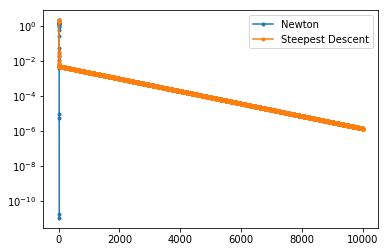

In [18]:
x0 = np.array( (-1.2, 1.0) )
(en,niter_n,x_n) = runOptim(x0,'newton','a')
(es,niter_s,x_s) = runOptim(x0,'steepest','a')

plt.figure()
plt.semilogy(np.arange(niter_n+1),en,'.-',np.arange(niter_s+1),es,'.-')
plt.legend(('Newton','Steepest Descent',))
plt.show()

## Part 3c

Here we see that each criteria converges faster. Interestingly the three methods have show the same error until roughly 15 iterations.

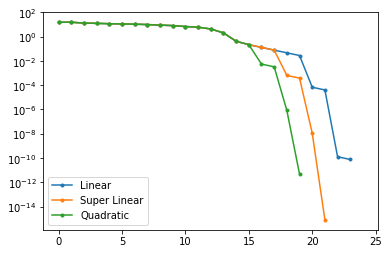

In [60]:
x0 = np.tile( (-1.2,1.0), 50)
(err1,niter1,x) = runOptim(x0,'newton','a')
(err2,niter2,x) = runOptim(x0,'newton','b')
(err3,niter3,x) = runOptim(x0,'newton','c')

plt.figure()
plt.semilogy(np.arange(niter1+1),err1,'.-')
plt.semilogy(np.arange(niter2+1),err2,'.-')
plt.semilogy(np.arange(niter3+1),err3,'.-')
plt.legend(('Linear','Super Linear','Quadratic'))
plt.show()

## Part 3d

Increasing the numebr of iterations generates more initial error. This is noticeably greater with $n=1000$. The solution still converges in just over 20 iterations, however. 

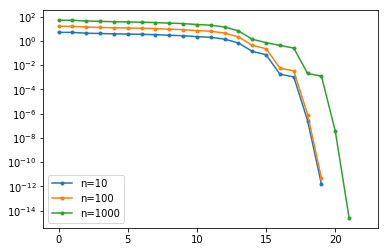

In [64]:
x0 = np.tile( (-1.2,1.0), 5)
x1 = np.tile( (-1.2,1.0), 50)
x2 = np.tile( (-1.2,1.0), 500)


(err0,niter0,x) = runOptim(x0,'newton','c')
(err1,niter1,x) = runOptim(x1,'newton','c')
(err2,niter2,x) = runOptim(x2,'newton','c')


plt.figure()
plt.semilogy(np.arange(niter0+1),err0,'.-')
plt.semilogy(np.arange(niter1+1),err1,'.-')
plt.semilogy(np.arange(niter2+1),err2,'.-')
plt.legend(('n=10','n=100','n=1000'))
plt.show()

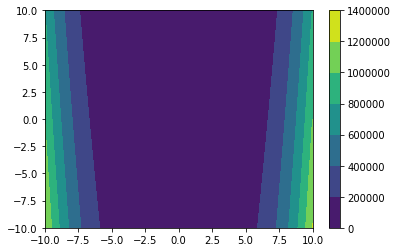

In [65]:
# --- Plot the rosen
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
xv, yv = np.meshgrid(x,y)
ff = np.zeros(xv.shape)
for i in np.arange(xv.shape[0]):
    for j in np.arange(xv.shape[1]):
        ff[i,j] = rosen((xv[i,j],yv[i,j]))
        
        
plt.figure()
plt.contourf(xv,yv,ff)
plt.colorbar()
plt.show()